In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

KeyboardInterrupt: 

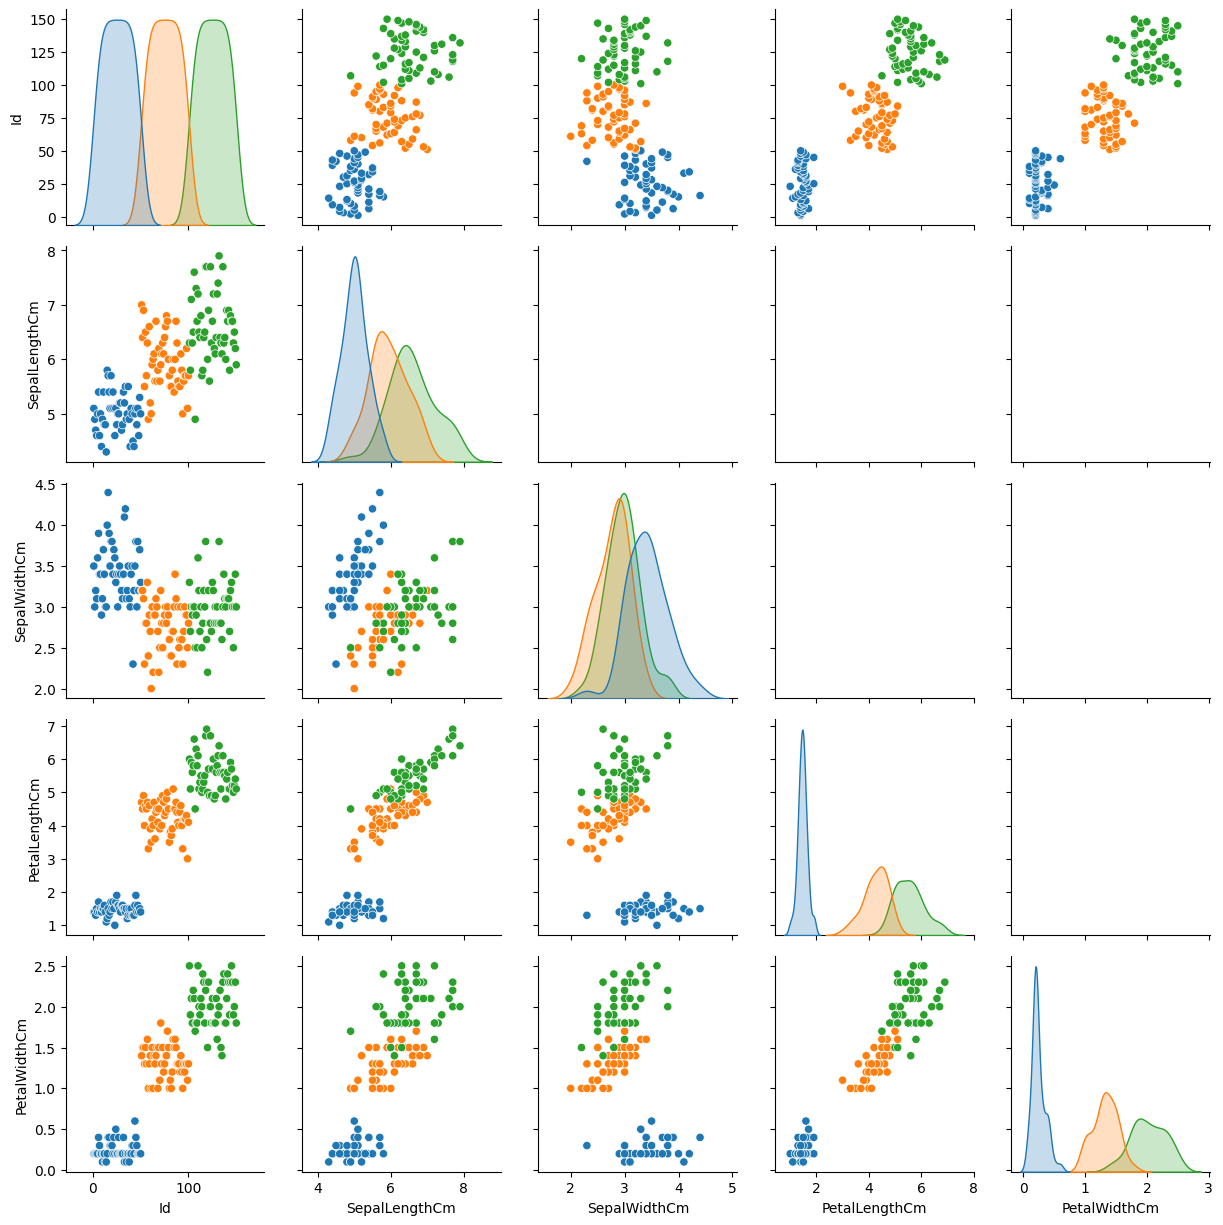

In [4]:
sns.pairplot(data=df , hue='Species')

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
X=df.drop(columns=['Species', 'Id'],axis=1)
y=df['Species']

In [ ]:
encoder=LabelEncoder()
y_int=encoder.fit_transform(y)

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
y_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y_int , test_size=0.2, random_state=42)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


In [ ]:
per=Perceptron(max_iter=1000 , random_state= 42 )

In [ ]:
per.fit(X_train_scaled,y_train)

Perceptron(random_state=42)

In [ ]:
y_pred=per.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred)

0.9

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.80      0.89      0.84         9
           2       1.00      0.82      0.90        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



In [ ]:
y_train_cat=to_categorical(y_train , num_classes=3)
y_test_cat=to_categorical(y_test , num_classes=3)


In [ ]:
model=Sequential([
    Dense(16,input_dim=4, activation='relu'),
    Dense(8 , activation='relu'),
    Dense(3,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(
    X_train_scaled , y_train_cat ,
    epochs=100 , batch_size=8 , validation_split=0.2 , verbose=1 
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6042 - loss: 0.9400 - val_accuracy: 0.8333 - val_loss: 0.8347
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6250 - loss: 0.8909 - val_accuracy: 0.8750 - val_loss: 0.7854
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6771 - loss: 0.8446 - val_accuracy: 0.9167 - val_loss: 0.7325
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7188 - loss: 0.7972 - val_accuracy: 0.9167 - val_loss: 0.6800
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7604 - loss: 0.7497 - val_accuracy: 0.9167 - val_loss: 0.6374
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7604 - loss: 0.7032 - val_accuracy: 0.9167 - val_loss: 0.5937
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7604 - loss: 0.6571 - val_accuracy: 0.9167 - val_loss: 0.5561
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7812 - loss: 0.6144 - val_accuracy: 0.

In [ ]:
loss , acc= model.evaluate(X_test_scaled ,y_test_cat , verbose=0)
print(acc)

0.9666666388511658


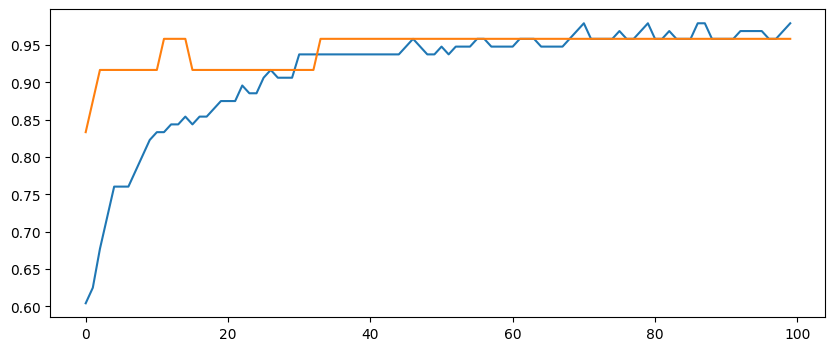

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='value acc')